In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('eda_outliers_dataset1.csv')

In [4]:
df.head(10)

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229
5,2015,37894191
6,2014,34919173
7,2013,27600898
8,2012,28807552
9,2011,31392058


In [5]:
def readable_numbers(x):
  """takes a large number and formats it into K,M to make it more readable"""
  if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
  else:
        s = '{:1.0f}K'.format(x*1e-3)
  return s



In [7]:
df['number_of_strikes_readable'] = df['number_of_strikes'].apply(readable_numbers)
df.head(10)

,year,number_of_strikes,number_of_strikes_readable
0,2020,15620068,15.6M
1,2019,209166,209K
2,2018,44600989,44.6M
3,2017,35095195,35.1M
4,2016,41582229,41.6M
5,2015,37894191,37.9M
6,2014,34919173,34.9M
7,2013,27600898,27.6M
8,2012,28807552,28.8M
9,2011,31392058,31.4M


In [11]:
print('Mean: ' + readable_numbers(np.mean(df['number_of_strikes'])))
print('Median: ' + readable_numbers(np.median(df['number_of_strikes'])))
print('Min: ' + readable_numbers(np.min(df['number_of_strikes'])))
print('Max: ' + readable_numbers(np.max(df['number_of_strikes'])))

Mean: 26.8M
Median: 28.3M
Min: 209K
Max: 44.6M


<ipython-input-16-73e695b1615a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


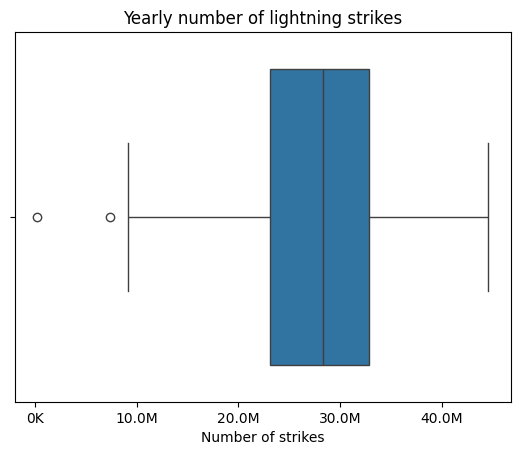

In [16]:
box = sns.boxplot(x = df['number_of_strikes'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Number of strikes')
plt.title('Yearly number of lightning strikes');

In [18]:
# Calculate 25th percentile of annual strikes
percentile25 = df['number_of_strikes'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df['number_of_strikes'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: '+ readable_numbers(lower_limit))
print('Upper limit is: '+ readable_numbers(upper_limit))

Lower limit is: 8.6M
Upper limit is: 47.4M


In [19]:
# Isolate outliers on low end
df[df['number_of_strikes'] < lower_limit]

,year,number_of_strikes,number_of_strikes_readable
1,2019,209166,209K
33,1987,7378836,7.4M


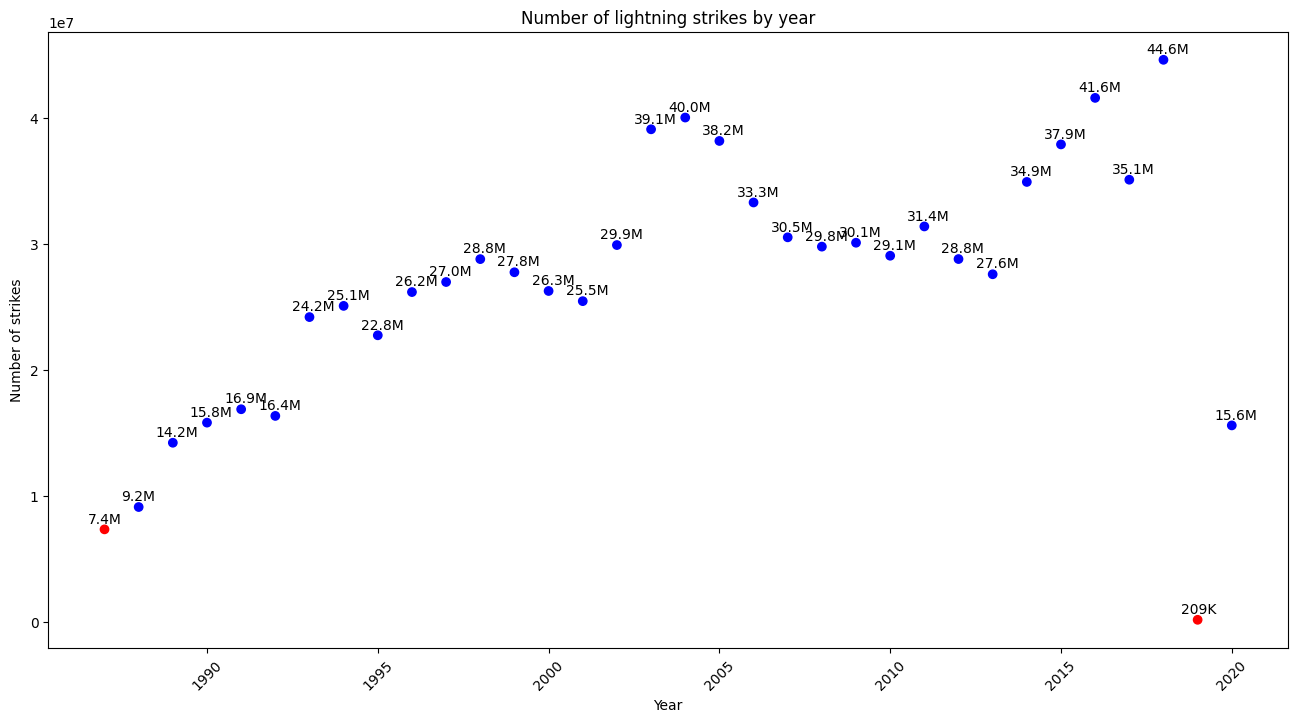

In [20]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i]-0.5, y[i]+500000, s=readable_numbers(y[i]))

colors = np.where(df['number_of_strikes'] < lower_limit, 'r', 'b')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['year'], df['number_of_strikes'],c=colors)
ax.set_xlabel('Year')
ax.set_ylabel('Number of strikes')
ax.set_title('Number of lightning strikes by year')
addlabels(df['year'], df['number_of_strikes'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()